In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [11]:
movies = pd.read_csv('qEHqag.csv')
movies

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
...,...,...,...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,Comedy,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
996,Giant,1956,201,Drama,7.6,George Stevens,Elizabeth Taylor,34075,195217415.0,84.0
997,From Here to Eternity,1953,118,Drama,7.6,Fred Zinnemann,Burt Lancaster,43374,30500000.0,85.0
998,Lifeboat,1944,97,Drama,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0


In [9]:
Q1 = movies.select_dtypes(include=['number']).quantile(0.25)
Q3 = movies.select_dtypes(include=['number']).quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (movies.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | (movies.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))
print("\nOutliers:")
outliers



Outliers:


,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,True,False
3,True,True,True,False,False
4,False,True,False,False,False
...,...,...,...,...,...
995,False,False,False,True,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,True,False


In [21]:
print("IMDB Rating Outliers:")
movies[outliers['IMDB_Rating']]

IMDB Rating Outliers:


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0
5,The Lord of the Rings: The Return of the King,2003,201,Action,8.9,Peter Jackson,Elijah Wood,1642758,377845905.0,94.0
6,Pulp Fiction,1994,154,Crime,8.9,Quentin Tarantino,John Travolta,1826188,107928762.0,94.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
8,Inception,2010,148,Action,8.8,Christopher Nolan,Leonardo DiCaprio,2067042,292576195.0,74.0
9,Fight Club,1999,139,Drama,8.8,David Fincher,Brad Pitt,1854740,37030102.0,66.0


In [17]:
print("\nOutliers Count:")
outliers.sum()


Outliers Count:


Runtime         29
IMDB_Rating     13
No_of_Votes     67
Gross          100
Metascore        7
dtype: int64

In [44]:
print("\nIQR Lower Range for 'IMDB_Rating':")
print(Q1['IMDB_Rating'] - 1.5 * IQR['IMDB_Rating'])

# WHat was IQR upper range for IMDB_Rating
print("\nIQR Upper Range for 'IMDB_Rating':")
print(Q3['IMDB_Rating'] + 1.5 * IQR['IMDB_Rating'])

# show all IMDB_Rating values that are outliers as series
print("\nIMDB_Rating Outliers:")
movies[outliers['IMDB_Rating']]['IMDB_Rating']



IQR Lower Range for 'IMDB_Rating':
7.100000000000001

IQR Upper Range for 'IMDB_Rating':
8.7

IMDB_Rating Outliers:


0     9.3
1     9.2
2     9.0
3     9.0
4     9.0
5     8.9
6     8.9
7     8.9
8     8.8
9     8.8
10    8.8
11    8.8
12    8.8
Name: IMDB_Rating, dtype: float64

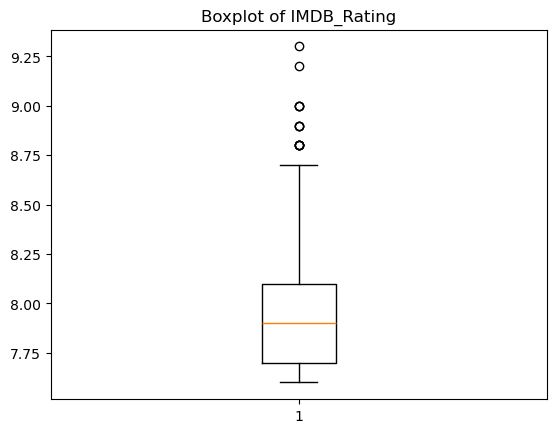

In [33]:
# Create box plot for 'IMDB_Rating' column
plt.boxplot(movies['IMDB_Rating'])
plt.title('Boxplot of IMDB_Rating')
plt.show()


NOW STARTING OUTLIERS FOR METASCORE

In [38]:
print("Metascore Outliers:")
movies[outliers['Metascore']]



Metascore Outliers:


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
356,Tropa de Elite,2007,115,Action,8.0,José Padilha,Wagner Moura,98097,8060.0,33.0
648,The Boondock Saints,1999,108,Action,7.8,Troy Duffy,Willem Dafoe,227143,25812.0,44.0
735,Kai po che!,2013,130,Drama,7.7,Abhishek Kapoor,Amit Sadh,32628,1122527.0,40.0
788,I Am Sam,2001,132,Drama,7.7,Jessie Nelson,Sean Penn,142863,40311852.0,28.0
917,Seven Pounds,2008,123,Drama,7.6,Gabriele Muccino,Will Smith,286770,69951824.0,36.0
942,The Butterfly Effect,2004,113,Drama,7.6,Eric Bress,J. Mackye Gruber,451479,57938693.0,30.0
957,Fear and Loathing in Las Vegas,1998,118,Adventure,7.6,Terry Gilliam,Johnny Depp,259753,10680275.0,41.0


In [52]:
print("\nIQR Lower Range for 'IMDB_Rating':")
print(Q1['Metascore'] - 1.5 * IQR['Metascore'])

# WHat was MetaScore upper range for Metascore
print("\nIQR Upper Range for 'IMDB_Rating':")
print(Q3['Metascore'] + 1.5 * IQR['Metascore'])

# show all MetaScore values that are outliers as series
print("Metascore Outliers:")
movies[outliers['Metascore']]['Metascore']



IQR Lower Range for 'IMDB_Rating':
44.5

IQR Upper Range for 'IMDB_Rating':
112.5
Metascore Outliers:


356    33.0
648    44.0
735    40.0
788    28.0
917    36.0
942    30.0
957    41.0
Name: Metascore, dtype: float64

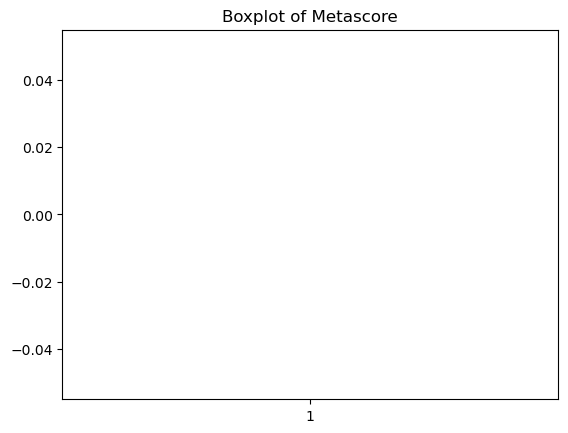

In [54]:
# Create box plot for 'Metascore' column
plt.boxplot(movies['Metascore'])
plt.title('Boxplot of Metascore')
plt.show()
